<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [1]:
# This replicates all the progress made in the lecture notes.
import pandas as pd
import numpy as np

!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
!unzip /content/LoanStats_2018Q4.csv.zip
print('csv obtained')
loan_data = pd.read_csv('/content/LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')
loan_data.drop(['desc','url','member_id','id'], axis=1, inplace=True)
print('loan_data constructed')

def int_rate_to_float(rate):
  return float(rate.strip('%')) /100
loan_data['int_rate'] = loan_data['int_rate'].apply(int_rate_to_float)
print('int_rate column cast to float')

def clean_titles(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return 'Unknown'
loan_data['emp_title'] = loan_data['emp_title'].apply(clean_titles)
print('emp_title column cleaned')

loan_data['issue_d'] = loan_data['issue_d'].apply(pd.to_datetime)
loan_data['issue_year'] = loan_data['issue_d'].dt.year
loan_data['issue_month'] = loan_data['issue_d'].dt.month
print('issue_d converted to date and added issue_year & issue_month')

loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].apply(pd.to_datetime)
loan_data['days_from_earliest_credit_to_issue'] = loan_data['issue_d'] - loan_data['earliest_cr_line']
print('earliest_cr_line converted to date & created days_from...')

print(loan_data.shape)
loan_data.head()

--2020-09-08 21:58:21--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 54.244.115.45, 54.148.13.215, 35.161.89.82
Connecting to resources.lendingclub.com (resources.lendingclub.com)|54.244.115.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip.1’

LoanStats_2018Q4.cs     [              <=>   ]  22.28M  6.13MB/s    in 4.1s    

2020-09-08 21:58:26 (5.48 MB/s) - ‘LoanStats_2018Q4.csv.zip.1’ saved [23360898]

Archive:  /content/LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
csv obtained
loan_data constructed
int_rate column cast to float
emp_title column cleaned
issue_d converted to date and added issue_year & issue_month
earliest_cr_line converted to date & created days_from...
(128412, 143)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issue_year,issue_month,days_from_earliest_credit_to_issue
0,27975,27975,27975.0,36 months,0.1447,962.52,C,C2,Conductor,10+ years,MORTGAGE,180000.0,Not Verified,2018-12-01,Fully Paid,n,credit_card,Credit card refinancing,117xx,NY,11.47,0,1995-07-01,0,39.0,NaN,10,0,29711,66.8%,19,w,0.00,0.00,31804.529849,31804.53,27975.00,3829.53,0.0,0.00,...,286525,45387,29500,25025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12,8554 days
1,10000,10000,10000.0,60 months,0.1298,227.43,B,B5,Printer,9 years,RENT,60000.0,Not Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,660xx,KS,14.90,0,2007-05-01,0,NaN,112.0,7,1,10677,54.2%,12,w,7352.95,7352.95,4487.310000,4487.31,2647.05,1840.26,0.0,0.00,...,36200,27595,13000,16500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12,4232 days
2,28000,28000,28000.0,60 months,0.1356,645.15,C,C1,Project Manager,10+ years,MORTGAGE,128500.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,760xx,TX,27.35,1,1987-07-01,0,24.0,NaN,16,0,55206,75%,31,w,20667.91,20667.91,12871.360000,12871.36,7332.09,5539.27,0.0,0.00,...,542027,128345,55000,60331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12,11476 days
3,16000,16000,16000.0,60 months,0.1356,368.66,C,C1,Lmsw,10+ years,RENT,46000.0,Not Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,787xx,TX,11.09,1,1997-10-01,1,11.0,NaN,9,0,18946,32.1%,21,w,11503.84,11503.84,7570.880000,7570.88,4496.16,3074.72,0.0,0.00,...,138125,128218,57600,79125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12,7731 days
4,7500,7500,7500.0,36 months,0.1072,244.55,B,B2,Program Manager,2 years,RENT,84000.0,Not Verified,2018-12-01,Charged Off,n,debt_consolidation,Debt consolidation,600xx,IL,3.86,0,2005-05-01,1,NaN,114.0,9,1,2200,12.6%,17,w,0.00,0.00,2829.930000,2829.93,1465.61,484.09,0.0,880.23,...,403892,20833,17400,16812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12,4962 days


- Convert the `term` column from string to integer.

In [8]:
# loan_data['term'][:20]
# print('term has',loan_data['term'].isnull().sum(),'null values')
# print(loan_data['term'].str.match(r' (\d+) ').sum(),'of 128412')
# loan_data['term'] = loan_data['term'].str.extract(r' (\d+) ')[0].apply(int)

loan_data['term'] = loan_data['term'].str.extract(r' (\d+) ')[0].apply(int)
loan_data['term']

0         36
1         60
2         60
3         60
4         36
          ..
128407    36
128408    36
128409    36
128410    36
128411    36
Name: term, Length: 128412, dtype: int64

36    88179
60    40233
Name: term, dtype: int64

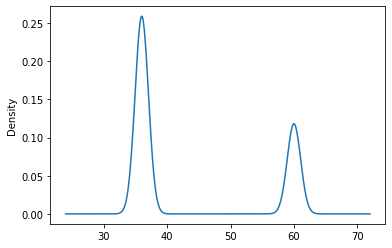

In [10]:
loan_data['term'].plot.density();
loan_data['term'].value_counts()

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

In [15]:
# loan_data['loan_status'].unique()

def loan_status_is_great(loan_status):
    switcher = {'Fully Paid': 1, 'Current': 1}
    return switcher.get(loan_status, 0)

loan_data['loan_status_is_great'] = loan_data['loan_status'].apply(loan_status_is_great)
loan_data['loan_status_is_great']

0         1
1         1
2         1
3         1
4         0
         ..
128407    0
128408    1
128409    1
128410    1
128411    1
Name: loan_status_is_great, Length: 128412, dtype: int64

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [22]:
print(loan_data.columns[loan_data.columns.str.match(r'last.*')].to_numpy())
loan_data['last_pymnt_d'] = loan_data['last_pymnt_d'].apply(pd.to_datetime)
loan_data['last_pymnt_d_year'] = loan_data['issue_d'].dt.year
loan_data['last_pymnt_d_month'] = loan_data['issue_d'].dt.month
loan_data[['last_pymnt_d','last_pymnt_d_year','last_pymnt_d_month']].head()

['last_pymnt_d' 'last_pymnt_amnt' 'last_credit_pull_d']


,last_pymnt_d,last_pymnt_d_year,last_pymnt_d_month
0,2020-01-01,2018,12
1,2020-08-01,2018,12
2,2020-08-01,2018,12
3,2020-08-01,2018,12
4,2019-09-01,2018,12


In [65]:
# This replicates all the progress made so far.
import pandas as pd
import numpy as np

# !wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
# !unzip /content/LoanStats_2018Q4.csv.zip
print('csv obtained')
loan_data = pd.read_csv('/content/LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')
loan_data.drop(['desc','url','member_id','id'], axis=1, inplace=True)
print('loan_data constructed')

first_row_values = loan_data.iloc[0].str
percent_column_names = loan_data.columns[first_row_values.match(r'.*%.*')==True]
def percent_to_float(rate):
  if isinstance(rate, str):
    return float(rate.strip('%')) /100
  else:
    return np.NaN
for column_name in percent_column_names:
  loan_data[column_name] = loan_data[column_name].apply(percent_to_float)
print('columns',list(percent_column_names),'converted to floats')

def clean_titles(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return 'Unknown'
loan_data['emp_title'] = loan_data['emp_title'].apply(clean_titles)
print('emp_title stripped and Properly Titled')

loan_data['issue_d'] = loan_data['issue_d'].apply(pd.to_datetime)
loan_data['issue_year'] = loan_data['issue_d'].dt.year
loan_data['issue_month'] = loan_data['issue_d'].dt.month
print('issue_d converted to date and added issue_year & issue_month')

loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].apply(pd.to_datetime)
loan_data['days_from_earliest_credit_to_issue'] = loan_data['issue_d'] - loan_data['earliest_cr_line']
print('earliest_cr_line converted to date & created days_from...')

loan_data['term'] = loan_data['term'].str.extract(r' (\d+) ')[0].apply(int)
print('term cast to integer')

def loan_status_is_great(loan_status):
    switcher = {'Fully Paid': 1, 'Current': 1}
    return switcher.get(loan_status, 0)
loan_data['loan_status_is_great'] = loan_data['loan_status'].apply(loan_status_is_great)
print('loan_status_is_great created')

loan_data['last_pymnt_d'] = loan_data['last_pymnt_d'].apply(pd.to_datetime)
loan_data['last_pymnt_d_year'] = loan_data['issue_d'].dt.year
loan_data['last_pymnt_d_month'] = loan_data['issue_d'].dt.month
print('last_pymnt_d converted to date and added year & month columns')

print(loan_data.shape)
loan_data.head()

csv obtained
loan_data constructed
percent columns converted to floats
issue_d converted to date and added issue_year & issue_month
earliest_cr_line converted to date & created days_from...
term cast to integer
loan_status_is_great created
last_pymnt_d converted to date and added year & month columns
(128412, 146)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issue_year,issue_month,days_from_earliest_credit_to_issue,loan_status_is_great,last_pymnt_d_year,last_pymnt_d_month
0,27975,27975,27975.0,36,0.1447,962.52,C,C2,Conductor,10+ years,MORTGAGE,180000.0,Not Verified,2018-12-01,Fully Paid,n,credit_card,Credit card refinancing,117xx,NY,11.47,0,1995-07-01,0,39.0,NaN,10,0,29711,0.668,19,w,0.00,0.00,31804.529849,31804.53,27975.00,3829.53,0.0,0.00,...,25025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12,8554 days,1,2018,12
1,10000,10000,10000.0,60,0.1298,227.43,B,B5,Printer,9 years,RENT,60000.0,Not Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,660xx,KS,14.90,0,2007-05-01,0,NaN,112.0,7,1,10677,0.542,12,w,7352.95,7352.95,4487.310000,4487.31,2647.05,1840.26,0.0,0.00,...,16500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12,4232 days,1,2018,12
2,28000,28000,28000.0,60,0.1356,645.15,C,C1,Project Manager,10+ years,MORTGAGE,128500.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,760xx,TX,27.35,1,1987-07-01,0,24.0,NaN,16,0,55206,0.750,31,w,20667.91,20667.91,12871.360000,12871.36,7332.09,5539.27,0.0,0.00,...,60331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12,11476 days,1,2018,12
3,16000,16000,16000.0,60,0.1356,368.66,C,C1,LMSW,10+ years,RENT,46000.0,Not Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,787xx,TX,11.09,1,1997-10-01,1,11.0,NaN,9,0,18946,0.321,21,w,11503.84,11503.84,7570.880000,7570.88,4496.16,3074.72,0.0,0.00,...,79125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12,7731 days,1,2018,12
4,7500,7500,7500.0,36,0.1072,244.55,B,B2,Program Manager,2 years,RENT,84000.0,Not Verified,2018-12-01,Charged Off,n,debt_consolidation,Debt consolidation,600xx,IL,3.86,0,2005-05-01,1,NaN,114.0,9,1,2200,0.126,17,w,0.00,0.00,2829.930000,2829.93,1465.61,484.09,0.0,880.23,...,16812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12,4962 days,0,2018,12


# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

In [59]:
print(loan_data[['int_rate','revol_util']][:5])
print(loan_data[['int_rate','revol_util']].dtypes)

  int_rate revol_util
0   14.47%      66.8%
1   12.98%      54.2%
2   13.56%        75%
3   13.56%      32.1%
4   10.72%      12.6%
int_rate      object
revol_util    object
dtype: object


In [64]:
first_row_values = loan_data.iloc[0].str
percent_column_names = loan_data.columns[first_row_values.match(r'.*%.*')==True]

def percent_to_float(rate):
  if isinstance(rate, str):
    return float(rate.strip('%')) /100
  else:
    return np.NaN

for column_name in percent_column_names:
  loan_data[column_name] = loan_data[column_name].apply(percent_to_float)

loan_data[percent_column_names]

,int_rate,revol_util
0,0.1447,0.668
1,0.1298,0.542
2,0.1356,0.750
3,0.1356,0.321
4,0.1072,0.126
...,...,...
128407,0.1502,0.436
128408,0.1502,0.371
128409,0.1356,0.273
128410,0.1106,0.131


In [70]:
first_row_values = loan_data.iloc[0].str
number_column_names = loan_data.columns[first_row_values.match(r'.*\d{2,}.*')==True]
print(number_column_names)
print(loan_data.dtypes.to_numpy())
# def clean_titles(title):
#   if isinstance(title, str):
#     return title.strip().title()
#   else:
#     return 'Unknown'
# for column_name in number_column_names:
#   loan_data[column_name] = loan_data[column_name].apply(clean_titles)
# print('columns',list(number_column_names),'cast to numbers')

Index(['emp_length', 'zip_code', 'last_credit_pull_d'], dtype='object')
[dtype('int64') dtype('int64') dtype('float64') dtype('int64')
 dtype('float64') dtype('float64') dtype('O') dtype('O') dtype('O')
 dtype('O') dtype('O') dtype('float64') dtype('O') dtype('<M8[ns]')
 dtype('O') dtype('O') dtype('O') dtype('O') dtype('O') dtype('O')
 dtype('float64') dtype('int64') dtype('<M8[ns]') dtype('int64')
 dtype('float64') dtype('float64') dtype('int64') dtype('int64')
 dtype('int64') dtype('float64') dtype('int64') dtype('O')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('<M8[ns]') dtype('float64') dtype('O') dtype('O')
 dtype('int64') dtype('float64') dtype('int64') dtype('O')
 dtype('float64') dtype('float64') dtype('O') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('float64') dtype('int64')
 dtype('float64')

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [ ]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [ ]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [ ]:
# %cd instacart_2017_05_01